this notebook shows how to obtain TMD and mergegrams from neurological trees using the morphopy library

https://github.com/berenslab/MorphoPy

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# nice plotting util
from utils import hierarchy_pos

### Load a sample morphology from an swc file
Note that nodes 1 and 32 are skipped as their coordinates overlap with node 0.

In [2]:
from morphopy.computation import file_manager as fm
import morphopy.neurontree.NeuronTree as nt

In [3]:
filepath = 'sample.swc'
N = fm.load_swc_file(filepath)

In [4]:
len(N.get_graph().nodes())

51

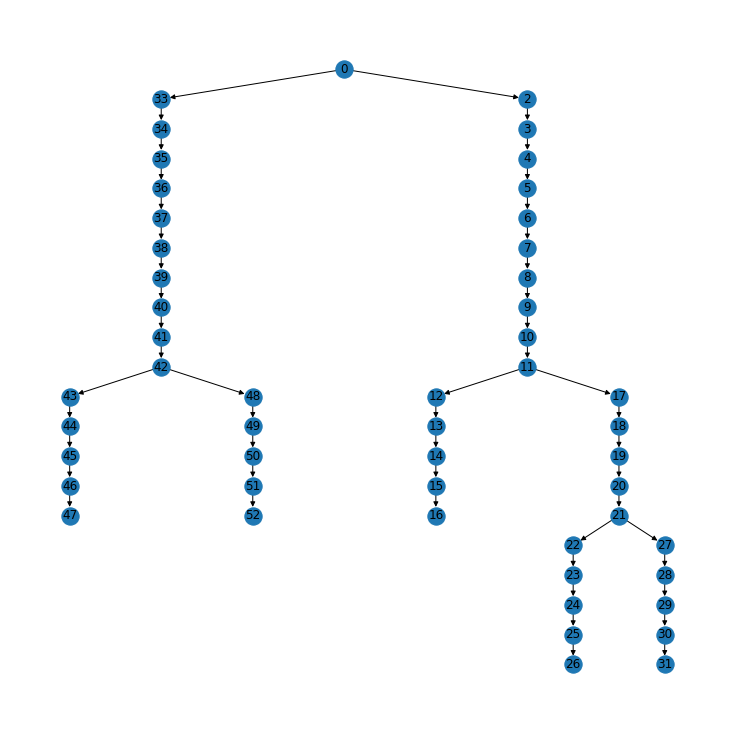

In [5]:
pos = hierarchy_pos(N.get_graph())  
plt.figure(figsize=(10,10))
nx.draw(N.get_graph(), pos=pos, with_labels=True)

### Remove nodes with indegree and outdegree 1

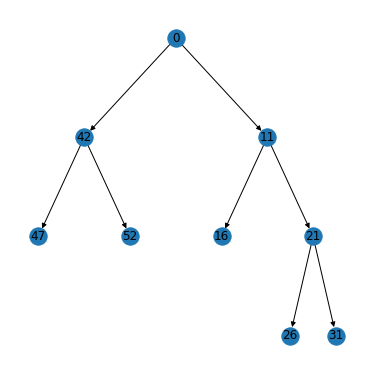

In [6]:
G = N.get_topological_minor().get_graph()

pos = hierarchy_pos(G)  
plt.figure(figsize=(5,5))
nx.draw(G, pos=pos, with_labels=True)

### Compute Topological Morphological Descriptor
Already implemented in morphopy via the get_persistence() function

In [7]:
from morphopy.computation.persistence_functions import path_length, radial_distance, height, branch_order
from morphopy.computation.feature_presentation import get_persistence

filter_function = radial_distance

tmd = get_persistence(N.get_topological_minor(), f=filter_function) 
tmd

,node_id,node_type,birth,death
0,47,3,11.180340,10.00000
1,31,2,12.247449,11.18034
2,16,2,11.180340,10.00000
3,42,3,11.180340,0.00000
4,0,1,12.247449,0.00000


### Compute mergegram
Straightforward to implement, each point in the mergegram correspond to an edge in the reduced graph

In [8]:
def mergegram(N, f):
    G = N.get_topological_minor().get_graph()
    
    mergegram = []
    root = N.get_root()
    
    for edge in G.edges():
        # birth and death values are with respect to the root
        mergegram.append([edge, f(G, edge[1], root), f(G, edge[0], root)])
        
    return pd.DataFrame(mergegram, columns=['edge', 'birth', 'death'])

In [9]:
m = mergegram(N, f=radial_distance)
m

,edge,birth,death
0,"(0, 42)",10.000000,0.00000
1,"(0, 11)",10.000000,0.00000
2,"(42, 47)",11.180340,10.00000
3,"(42, 52)",11.180340,10.00000
4,"(11, 16)",11.180340,10.00000
5,"(11, 21)",11.180340,10.00000
6,"(21, 26)",12.247449,11.18034
7,"(21, 31)",12.247449,11.18034


### Plot TMD and mergegram points in the persistence diagram

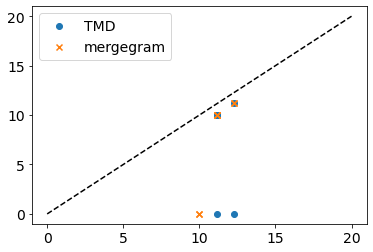

In [11]:
plt.scatter(tmd.birth, tmd.death, marker='o', label='TMD')
plt.scatter(m.birth, m.death, marker='x', label='mergegram')
plt.plot([0,20], [0,20], c='black', linestyle='dashed')
plt.legend()